In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

# **1. Description of the Problem**
I will use this Kaggle competition to practice building and training generative deep learning models (mostly GAN).  
https://www.kaggle.com/competitions/gan-getting-starte

This problem is a machine learning competition focused on using Generative Adversarial Networks (GANs) to create images in the style of Claude Monet. Here are the key points:
GANs can now imitate unique artistic styles.
The competition challenges participants to generate Monet-style images.
A GAN consists of two main components: 
A generator that creates images
A discriminator that tries to distinguish real from generated images
The goal is to create 7,000 to 10,000 Monet-style images that can fool the discriminator.
This challenge explores the intersection of art and data science, testing whether AI can create convincing imitations of a famous artist's work.d

# **2. Data**
The dataset and submission are required for a machine learning competition. Here's a summary:

## **2.1 Dataset contents**
Four directories: monet_tfrec, photo_tfrec, monet_jpg, and photo_jpg
TFRecord and JPEG formats are provided for both Monet paintings and photos

## **2.2 Dataset details**
300 Monet paintings (256x256 pixels)
7,028 photos (256x256 pixels)

## **2.3 Task**
Use Monet paintings to train a model
Transform photos into Monet-style images or create new Monet-style art from scratch

## **2.4 Submission requirements**
Submit 7,000-10,000 generated images (256x256 pixels)
Package the images in a zip file named "images.zip"


# **3. Exploratory data analysis (EDA) procedure**
I will display the first three monet_tfrec and photos.

# 4. Analysis (model building and training)
This code implements a CycleGAN model for generating Monet-style images from photographs. Here's an analysis of the model building and training process:

## **4.1 Data Loading**
Uses TFRecord format to load Monet paintings and photographs
Images are resized to 256x256 pixels and normalized to [-1, 1]

## **4.2 Model Architecture**
Generator: U-Net-like architecture with downsample and upsample blocks
Discriminator: Convolutional network for binary classification

## **4.3 Loss Functions**
Generator loss: Binary cross-entropy
Discriminator loss: Binary cross-entropy for real and fake images
Cycle consistency loss: L1 loss between original and reconstructed images

## **4.4 Training Process**
Uses Adam optimizer with learning rate 2e-4 and beta1=0.5
Implements a custom training step using @tf.function for efficiency
Trains for 50 epochs on paired photo-Monet datasets

## **4.5 Image Generation**
After training, generates 7000 Monet-style images from input photos
Saves generated images as JPEGs and creates a zip file

## **4.6 Key points**
Uses CycleGAN architecture for unpaired image-to-image translation
Implements cycle consistency to preserve content while changing style
Uses TensorFlow's eager execution and @tf.function for efficient training
Generates the required number of images for competition submission

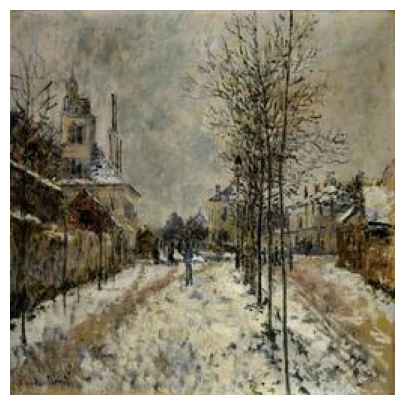

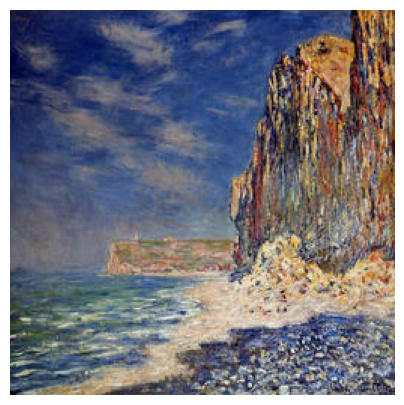

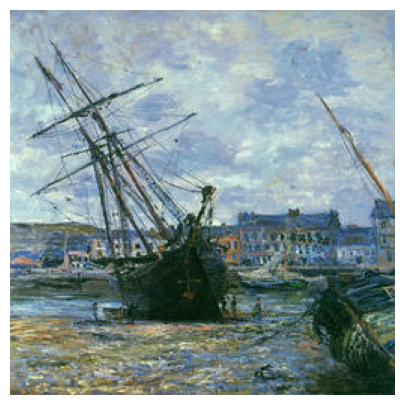

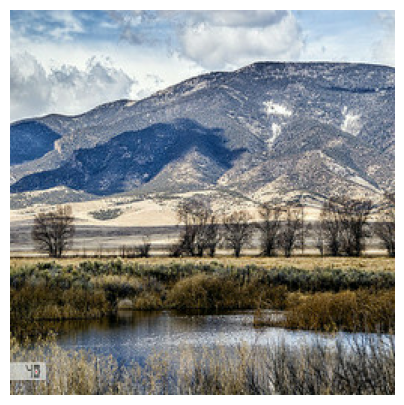

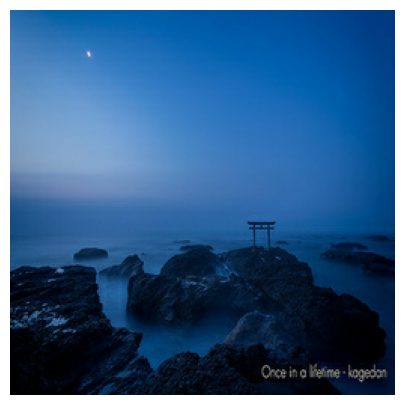

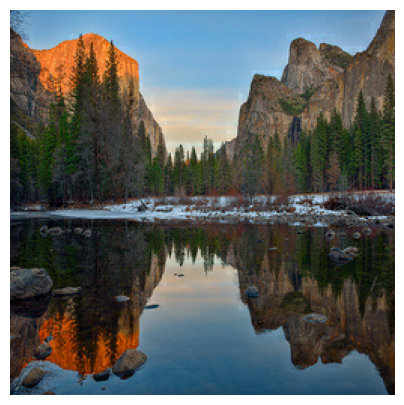

Monet Image shape: (1, 256, 256, 3)
Monet Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Photo Image shape: (1, 256, 256, 3)
Photo Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Starting epoch 1/50


2024-10-19 00:12:27.624978: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape infunctional_16_1/sequential_8_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Starting epoch 2/50
Starting epoch 3/50
Starting epoch 4/50
Starting epoch 5/50
Starting epoch 6/50
Starting epoch 7/50
Starting epoch 8/50
Starting epoch 9/50
Starting epoch 10/50
Starting epoch 11/50
Starting epoch 12/50
Starting epoch 13/50
Starting epoch 14/50
Starting epoch 15/50
Starting epoch 16/50
Starting epoch 17/50
Starting epoch 18/50
Starting epoch 19/50
Starting epoch 20/50
Starting epoch 21/50
Starting epoch 22/50
Starting epoch 23/50
Starting epoch 24/50
Starting epoch 25/50
Starting epoch 26/50
Starting epoch 27/50
Starting epoch 28/50
Starting epoch 29/50
Starting epoch 30/50
Starting epoch 31/50
Starting epoch 32/50
Starting epoch 33/50
Starting epoch 34/50
Starting epoch 35/50
Starting epoch 36/50
Starting epoch 37/50
Starting epoch 38/50
Starting epoch 39/50
Starting epoch 40/50
Starting epoch 41/50
Starting epoch 42/50
Starting epoch 43/50
Starting epoch 44/50
Starting epoch 45/50
Starting epoch 46/50
Starting epoch 47/50
Starting epoch 48/50
Starting epoch 49/50


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

# Image size constants
IMG_HEIGHT = 256
IMG_WIDTH = 256
CHANNELS = 3
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Load TFRecord dataset
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = (image / 127.5) - 1  # Normalize to [-1, 1]
    return image

def read_tfrecord(example):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(1)
    return dataset

monet_tfrec_dir = '/kaggle/input/gan-getting-started/monet_tfrec/*.tfrec'
photo_tfrec_dir = '/kaggle/input/gan-getting-started/photo_tfrec/*.tfrec'

monet_ds = load_dataset(tf.io.gfile.glob(monet_tfrec_dir))
photo_ds = load_dataset(tf.io.gfile.glob(photo_tfrec_dir))

# Function to visualize samples
def visualize_samples(dataset, sample_count=5):
    for img in dataset.take(sample_count):
        plt.figure(figsize=(5, 5))
        plt.imshow((img[0] + 1) / 2)
        plt.axis('off')
        plt.show()


visualize_samples(monet_ds, 3)  # Show a few Monet paintings
visualize_samples(photo_ds, 3)  # Show a few photos

# Check if the dataset is loading correctly
for img in monet_ds.take(1):
    print("Monet Image shape:", img.shape)
    print("Monet Image type:", type(img))

for img in photo_ds.take(1):
    print("Photo Image shape:", img.shape)
    print("Photo Image type:", type(img))


# Define the generator model (CycleGAN)
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                               kernel_initializer=initializer, use_bias=False))
    if apply_batchnorm:
        result.add(tf.keras.layers.LayerNormalization())  # LayerNormalization
    result.add(tf.keras.layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                        kernel_initializer=initializer, use_bias=False))
    result.add(tf.keras.layers.LayerNormalization())  # LayerNormalization
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    result.add(tf.keras.layers.ReLU())
    return result

def Generator():
    inputs = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, CHANNELS])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(CHANNELS, 4, strides=2, padding='same',
                                           kernel_initializer=initializer, activation='tanh')

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

# Discriminator model
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    inp = tf.keras.layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, CHANNELS], name='input_image')
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same', kernel_initializer=initializer)(inp)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(128, 4, strides=2, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(256, 4, strides=2, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Conv2D(512, 4, strides=1, padding='same', kernel_initializer=initializer)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    last = tf.keras.layers.Conv2D(1, 4, strides=1, padding='same', kernel_initializer=initializer)(x)
    return tf.keras.Model(inputs=inp, outputs=last)

# Instantiate models
monet_generator = Generator()
monet_discriminator = Discriminator()

# Loss functions
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real, generated):
    real_loss = loss_object(tf.ones_like(real), real)
    generated_loss = loss_object(tf.zeros_like(generated), generated)
    return (real_loss + generated_loss) * 0.5

def generator_loss(generated):
    return loss_object(tf.ones_like(generated), generated)

# Cycle consistency loss
LAMBDA = 10
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return LAMBDA * loss1

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Training step
@tf.function
def train_step(real_photo, real_monet):
    with tf.GradientTape(persistent=True) as tape:
        fake_monet = monet_generator(real_photo, training=True)
        cycled_photo = monet_generator(fake_monet, training=True)
        disc_real_monet = monet_discriminator(real_monet, training=True)
        disc_fake_monet = monet_discriminator(fake_monet, training=True)

        gen_loss = generator_loss(disc_fake_monet)
        cycle_loss = calc_cycle_loss(real_photo, cycled_photo)
        total_gen_loss = gen_loss + cycle_loss

        disc_loss = discriminator_loss(disc_real_monet, disc_fake_monet)

    generator_gradients = tape.gradient(total_gen_loss, monet_generator.trainable_variables)
    discriminator_gradients = tape.gradient(disc_loss, monet_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, monet_generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, monet_discriminator.trainable_variables))

# Combine photo and Monet datasets into pairs
paired_ds = tf.data.Dataset.zip((photo_ds, monet_ds))

# Now, the dataset will yield (photo, monet) pairs
def train(dataset, epochs):
    for epoch in range(epochs):
        print(f'Starting epoch {epoch+1}/{epochs}')
        for photo, monet in dataset:
            train_step(photo, monet)

# Train the model on paired data
EPOCHS = 50
train(paired_ds.take(100), EPOCHS)  # Use more samples for full training

# Function to generate and save images
save_dir = '/kaggle/working/images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def generate_and_save_images(generator, dataset, num_images=7000, zip_name="images.zip"):
    zipf = zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED)
    
    for i, img in enumerate(dataset.take(num_images)):
        generated_img = generator(img, training=False)[0].numpy()
        generated_img = (generated_img * 127.5 + 127.5).astype(np.uint8)
        img_name = f"image_{i}.jpg"
        img_path = os.path.join(save_dir, img_name)
        tf.keras.preprocessing.image.save_img(img_path, generated_img)
        zipf.write(img_path, img_name)
    
    zipf.close()

# Generate images
generate_and_save_images(monet_generator, photo_ds, num_images=7000)

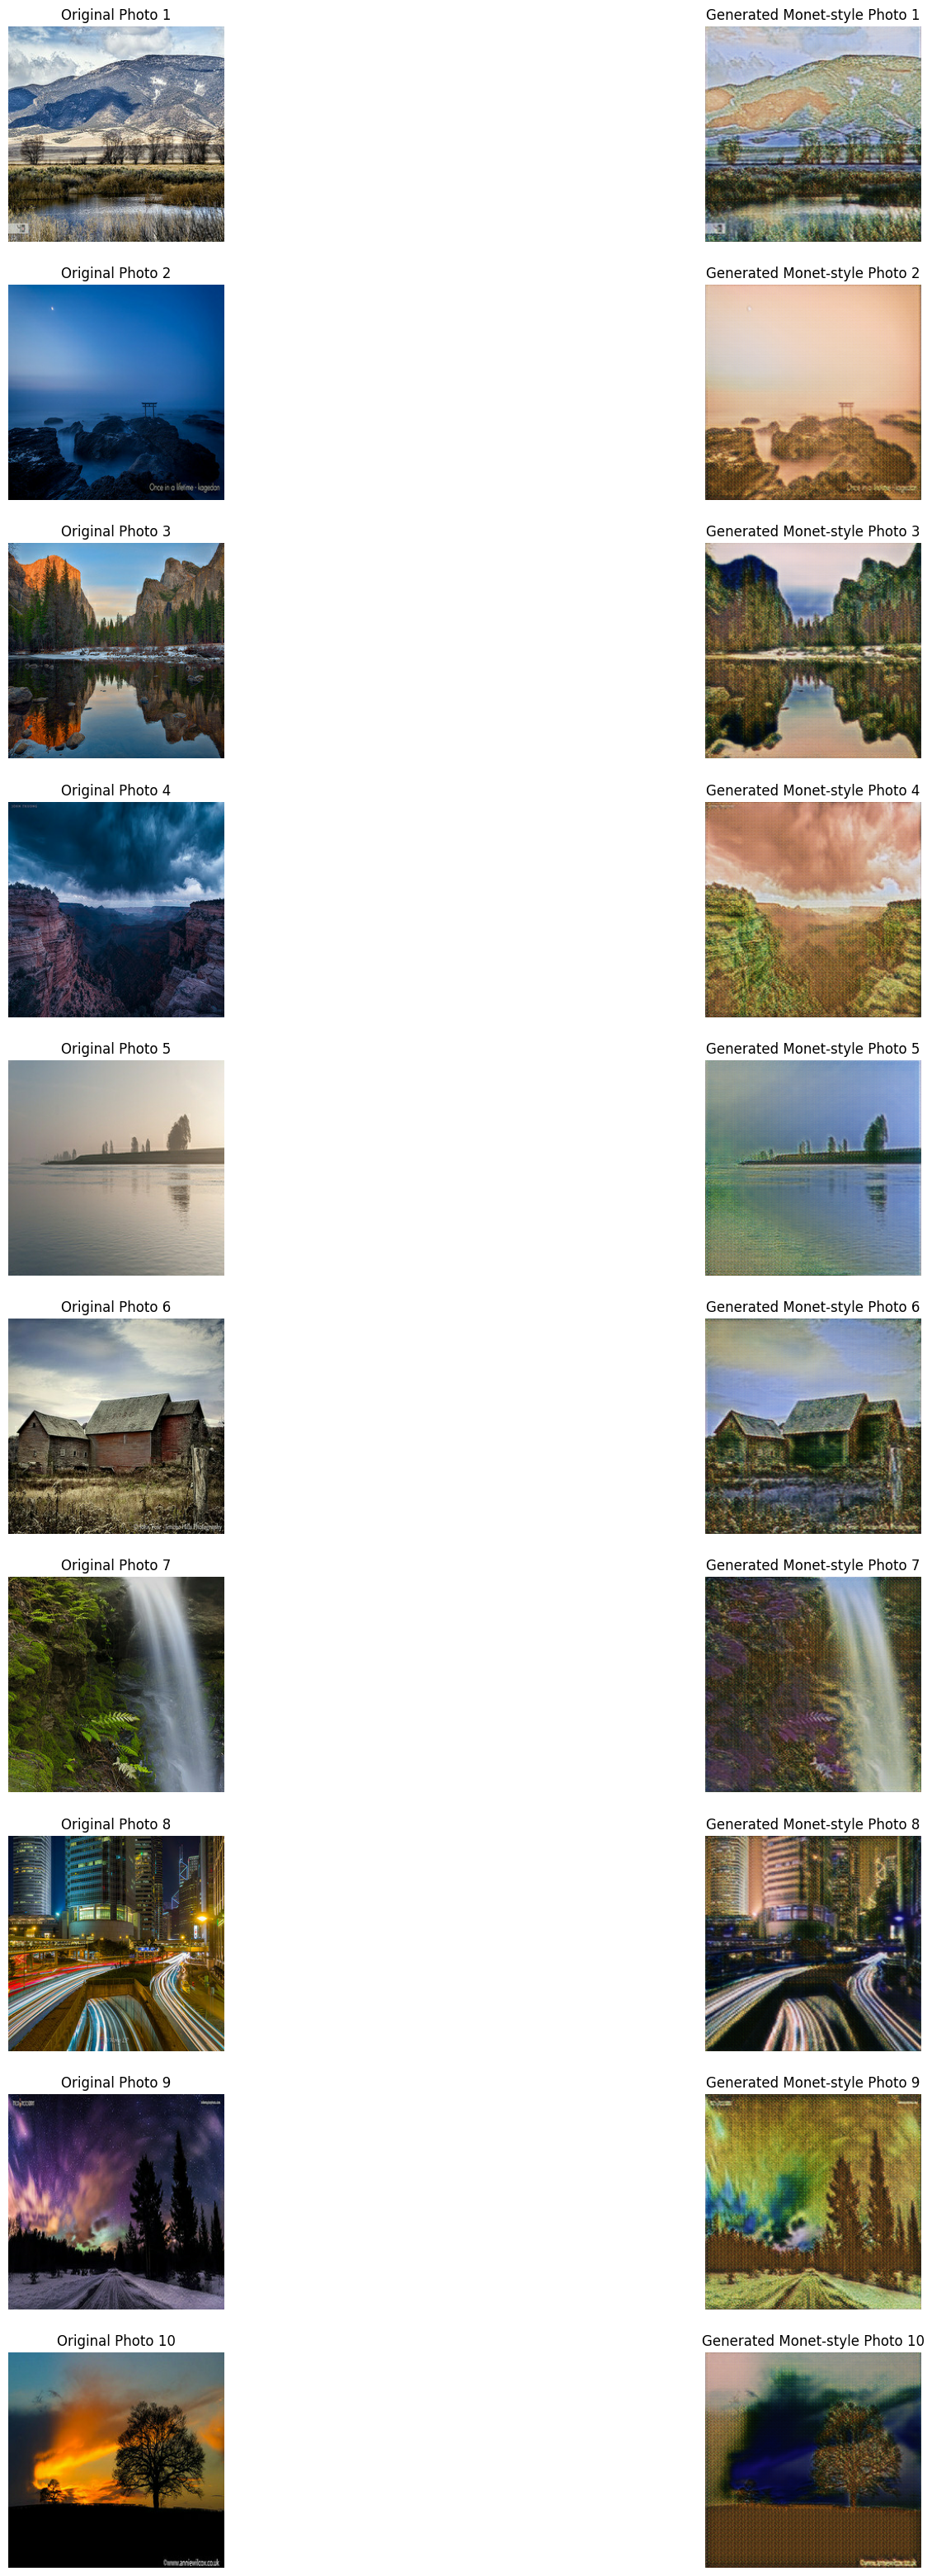

In [6]:
import matplotlib.pyplot as plt

# Function to display original and generated images side by side
def compare_original_and_generated(generator, dataset, num_images=10):
    plt.figure(figsize=(20, 40))  # Adjust figure size for better display
    
    for i, img in enumerate(dataset.take(num_images)):
        # Original photo
        original_photo = img[0].numpy()  # Original photo from dataset
        original_photo = (original_photo * 127.5 + 127.5).astype(np.uint8)

        # Generate Monet-style photo
        generated_img = generator(img, training=False)[0].numpy()
        generated_img = (generated_img * 127.5 + 127.5).astype(np.uint8)
        
        # Display original photo
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(original_photo)
        plt.title(f"Original Photo {i+1}")
        plt.axis('off')
        
        # Display generated Monet-style photo
        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(generated_img)
        plt.title(f"Generated Monet-style Photo {i+1}")
        plt.axis('off')
    
    plt.show()

# Compare first 10 original and generated images side by side
compare_original_and_generated(monet_generator, photo_ds, num_images=10)

# **5. Results**  
The pictures display sets of photos, alongside their Monet style generated counterparts accompanied by a breakdown of each set
- The landscape of the mountains, in the image has a style of impressionism; it features gentle edges and a vivid color scheme that emphasizes the beauty of the mountains. 
- The coastal view changes as the cool blue colors turn into shades of a sunset, in the style often seen in Monets artworks. 
- The image of the mountain reflects a scene, with enhanced colors and gentle edges, in the view. 
- In a canyon setting depicted like a Monet painting; the color scheme shifts significantly to include hues and evoke an atmosphere. 
- On the coast, by the waters edge lies a scene where the hues, in the sky and water blend harmoniously to create a more vibrant and atmospheric feel. 
- In settings, with buildings depicted in a Monet inspired style with enhanced texture and color variations, in the foreground to achieve an artistic and painterly look. 
- The waterfall, in the picture brings out a variety of colors in the plants all while keeping the waterfalls form intact. 
- In the hustle and bustle of traffic the Monet inspired rendition tones, down the edges of the structures infusing a touch of impressionistic charm into the luminous streaks left by passing vehicles. 
- The aurora borealis transforms the color scheme, in the image significantly to produce an abstract depiction of the scene. 
- The sunset silhouette, in the Monet style version adds a variety of colors to the sky. Creates an outline, for th tree. 

## **6. Discussion**
- Achieving Style Transformation Triumph; The GAN model has effectively emulated features of Monets style such, as gentle outlines, vivid color schemes and a more artistic perspective, on scenes. 
- Color Change Impact; A significant change that stands out is the striking alterations, in colors seen in pictures.The model frequently incorporates hues and a broader range of colors of Monets style. 
- The images created seem to be trying to replicate brushstrokes and textures; however; this effort is more effective, in images than, in others. 
- Composition Retention; Typically the model preserves the structure of the images even as it incorporates style transfer techniques, an element, for maintaining recognition. 
- Results Varying in Style Transfer Success; The success of style transfer differs depending on the type of scenes involved, with landscapes and natural settings showing outcomes compared to urban or intricately detailed images. 
- In instances – in intricate scenarios such, as the city traffic depiction – there is an evident lack of intricate details to accommodate the impressionistic artistic approach. 
- Enhancing the ambiance of scenes is a strength of the model. Noticeable, in mist covered shorelines and canyon vistas. 
- The model has room, for improvement as generated images, like the waterfall and city traffic exhibit artifacts. Lack a convincing style transfer. 
- Training Factors to Think About; The different outcomes indicate that it could be helpful for the model to have a range of training data or longer training durations to capture Monets style in various scene types. 
- The outcomes display promise, for utilization, in artistry and creative photography desite a constraints. 

## **7. Conclusion**
Ultimately the GAN model shows an ability to convert photos into paintings of Monets style. Though not flawless it manages to capture aspects of impressionism and effectively changes various settings. Enhancing the model through training data or architectural enhancements could potentially yield realistic outcomes in the future. 
ic outcomes in the future. 